In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
game=pd.read_csv('games.csv')
turns=pd.read_csv('turns.csv')

In [5]:
game.head()

,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
1,2,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418
2,3,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262
3,4,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141
4,5,STEEBot,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722


In [6]:
turns.head()

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play


LETS EXPLORE GAME DATASET

In [7]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72773 entries, 0 to 72772
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   game_id                72773 non-null  int64  
 1   first                  72773 non-null  object 
 2   time_control_name      72773 non-null  object 
 3   game_end_reason        72773 non-null  object 
 4   winner                 72773 non-null  int64  
 5   created_at             72773 non-null  object 
 6   lexicon                72773 non-null  object 
 7   initial_time_seconds   72773 non-null  int64  
 8   increment_seconds      72773 non-null  int64  
 9   rating_mode            72773 non-null  object 
 10  max_overtime_minutes   72773 non-null  int64  
 11  game_duration_seconds  72773 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 6.7+ MB


In [8]:
game.time_control_name.unique()

array(['regular', 'rapid', 'blitz', 'ultrablitz'], dtype=object)

In [9]:
game.lexicon.unique()

array(['NWL20', 'CSW21', 'ECWL', 'NSWL20'], dtype=object)

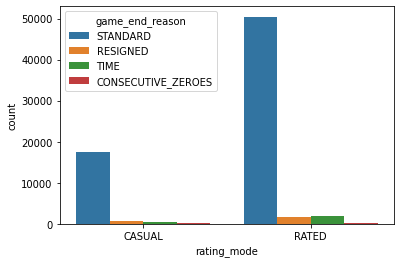

In [10]:
#game end reason vs rating mode

sns.countplot(x='rating_mode',hue='game_end_reason',data=game)
plt.show()

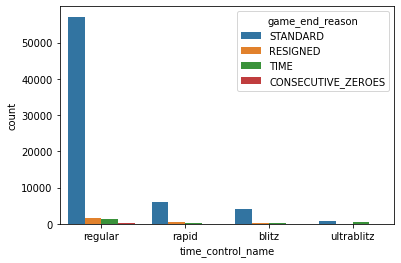

In [11]:
#game end reason vs time control name

sns.countplot(x='time_control_name',hue='game_end_reason',data=game)

SO, game dataset shows some characteristics like:

1. The game end reason was majority of the time because of the standard game play(win/loss)
2. The game end reason was minority of the time because of the consecutive zeros
3. In rated games apart from standard, time played a major role in determining the game end reason

LETS EXPLORE TURN DATASET

In [12]:
turns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446010 entries, 0 to 1446009
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   game_id      1446010 non-null  int64 
 1   turn_number  1446010 non-null  int64 
 2   nickname     1446010 non-null  object
 3   rack         1395962 non-null  object
 4   location     1350914 non-null  object
 5   move         1445667 non-null  object
 6   points       1446010 non-null  int64 
 7   score        1446010 non-null  int64 
 8   turn_type    1445711 non-null  object
dtypes: int64(4), object(5)
memory usage: 99.3+ MB


In [13]:
turns.isna().sum()

game_id            0
turn_number        0
nickname           0
rack           50048
location       95096
move             343
points             0
score              0
turn_type        299
dtype: int64

In [14]:
merge1=pd.merge(game,turns,on='game_id',how='inner')
merge1.head(2)

,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,turn_number,nickname,rack,location,move,points,score,turn_type
0,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,2,stevy,AEHOPUX,7H,HAP,18,18,Play


In [15]:
merge1.shape

(1446010, 20)

Lets get our training data incorporated for further analysis

In [16]:
train=pd.read_csv("train.csv")

In [17]:
master=pd.merge(merge1,train,on='game_id',how='inner')

In [18]:
master

,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,...,nickname_x,rack,location,move,points,score_x,turn_type,nickname_y,score_y,rating
0,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,...,BetterBot,DDEGITT,8G,DIG,10,10,Play,BetterBot,335,1637
1,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,...,BetterBot,DDEGITT,8G,DIG,10,10,Play,stevy,429,1500
2,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,...,stevy,AEHOPUX,7H,HAP,18,18,Play,BetterBot,335,1637
3,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,...,stevy,AEHOPUX,7H,HAP,18,18,Play,stevy,429,1500
4,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,...,BetterBot,DEELTTU,6I,LUTE,16,26,Play,BetterBot,335,1637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004121,52503,HastyBot,regular,STANDARD,0,2022-08-31 03:23:36,ECWL,900,0,CASUAL,...,HastyBot,DEELSTU,4D,DUSTE.,16,423,Play,HastyBot,439,1640
2004122,52503,HastyBot,regular,STANDARD,0,2022-08-31 03:23:36,ECWL,900,0,CASUAL,...,BB-8,CLNRTY,B10,CL.T,14,348,Play,BB-8,348,1500
2004123,52503,HastyBot,regular,STANDARD,0,2022-08-31 03:23:36,ECWL,900,0,CASUAL,...,BB-8,CLNRTY,B10,CL.T,14,348,Play,HastyBot,439,1640
2004124,52503,HastyBot,regular,STANDARD,0,2022-08-31 03:23:36,ECWL,900,0,CASUAL,...,HastyBot,EL,D2,LE.,4,427,Play,BB-8,348,1500


Missing values handling

In [19]:
merge1.isna().sum()/merge1.shape[0]*100         #type: ignore

game_id                  0.000000
first                    0.000000
time_control_name        0.000000
game_end_reason          0.000000
winner                   0.000000
created_at               0.000000
lexicon                  0.000000
initial_time_seconds     0.000000
increment_seconds        0.000000
rating_mode              0.000000
max_overtime_minutes     0.000000
game_duration_seconds    0.000000
turn_number              0.000000
nickname                 0.000000
rack                     3.461110
location                 6.576441
move                     0.023720
points                   0.000000
score                    0.000000
turn_type                0.020678
dtype: float64

In [20]:
master.columns

Index(['game_id', 'first', 'time_control_name', 'game_end_reason', 'winner',
       'created_at', 'lexicon', 'initial_time_seconds', 'increment_seconds',
       'rating_mode', 'max_overtime_minutes', 'game_duration_seconds',
       'turn_number', 'nickname_x', 'rack', 'location', 'move', 'points',
       'score_x', 'turn_type', 'nickname_y', 'score_y', 'rating'],
      dtype='object')

TARGET VAR

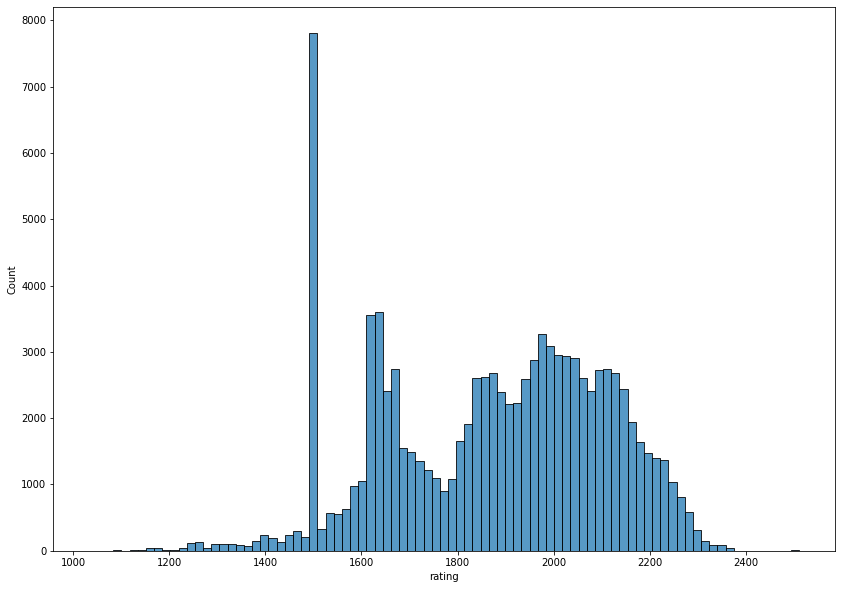

In [21]:
plt.figure(figsize=(14,10))
sns.histplot(train['rating'], ax=plt.gca())
plt.show()

Most players have rating of near to 1500

In [22]:
master.drop(columns=['created_at'],axis=1,inplace=True)

lets see best rated bots

In [23]:
#best rated player vs rating

master.groupby('nickname_y')['rating'].mean().sort_values(ascending=False).head(10)

nickname_y
TKC               2342.611111
JingYaoTheNoob    2254.000000
HBA               2231.085973
AWFUL             2214.355508
earth             2210.049296
patricck          2202.845645
Indominus         2202.700483
zloty             2195.198473
deflate2          2185.320611
forwords          2176.724392
Name: rating, dtype: float64

In [24]:
master['humanbot_x'] = ['Human' if "Bot" not in x else "Bot" for x in master['nickname_x']]
master['humanbot_y'] = ['Human' if "Bot" not in x else "Bot" for x in master['nickname_y']]

In [25]:
master.head(5)

,game_id,first,time_control_name,game_end_reason,winner,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,...,location,move,points,score_x,turn_type,nickname_y,score_y,rating,humanbot_x,humanbot_y
0,1,BetterBot,regular,STANDARD,1,NWL20,1200,0,CASUAL,1,...,8G,DIG,10,10,Play,BetterBot,335,1637,Bot,Bot
1,1,BetterBot,regular,STANDARD,1,NWL20,1200,0,CASUAL,1,...,8G,DIG,10,10,Play,stevy,429,1500,Bot,Human
2,1,BetterBot,regular,STANDARD,1,NWL20,1200,0,CASUAL,1,...,7H,HAP,18,18,Play,BetterBot,335,1637,Human,Bot
3,1,BetterBot,regular,STANDARD,1,NWL20,1200,0,CASUAL,1,...,7H,HAP,18,18,Play,stevy,429,1500,Human,Human
4,1,BetterBot,regular,STANDARD,1,NWL20,1200,0,CASUAL,1,...,6I,LUTE,16,26,Play,BetterBot,335,1637,Bot,Bot


In [26]:
master.turn_type.unique()

array(['Play', 'End', 'Exchange', 'Pass', 'Timeout', 'Six-Zero Rule', nan,
       'Challenge'], dtype=object)

In [27]:
master['rating_mode']=master['rating_mode'].map({'CASUAL':0,'RATED':1})

master['game_end_reason']=master['game_end_reason'].map({'STANDARD':0,'TIME':2,'RESIGNATION':1,'CONSECUTIVE_ZEROS':3})

master['lexicon']=master['lexicon'].map({'NWL20':0, 'CSW21':1, 'ECWL':2, 'NSWL20':3})

master['time_control_name']=master['time_control_name'].map({'regular':0, 'rapid':1, 'blitz':2, 'ultrablitz':3})

master['humanbot_x']=master['humanbot_x'].map({'Human':0, 'Bot':1})

master['humanbot_y']=master['humanbot_y'].map({'Human':0, 'Bot':1})

In [28]:
master.shape

(2004126, 24)

In [29]:
#drop null rows

master2=master.dropna()
master2.shape

(1826502, 24)

In [30]:
master2.columns

Index(['game_id', 'first', 'time_control_name', 'game_end_reason', 'winner',
       'lexicon', 'initial_time_seconds', 'increment_seconds', 'rating_mode',
       'max_overtime_minutes', 'game_duration_seconds', 'turn_number',
       'nickname_x', 'rack', 'location', 'move', 'points', 'score_x',
       'turn_type', 'nickname_y', 'score_y', 'rating', 'humanbot_x',
       'humanbot_y'],
      dtype='object')

In [31]:
master2.turn_type.unique()

array(['Play'], dtype=object)

In [32]:
master2.drop(columns=['turn_type'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
#getting dummies for turn type,rack,move,location with preserving memory

from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

lb.fit(master2['rack'])
master2['rack']=lb.fit_transform(master2['rack'])

lb.fit(master2['move'])
master2['move']=lb.fit_transform(master2['move'])

lb.fit(master2['location'])
master2['location']=lb.fit_transform(master2['location'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

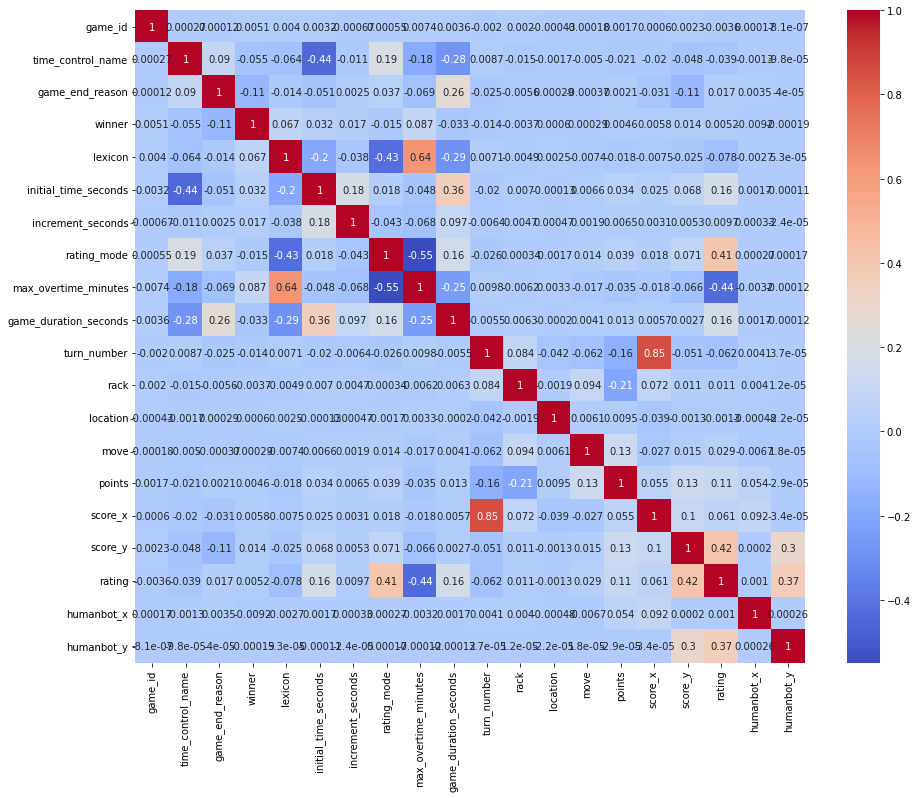

In [34]:
plt.figure(figsize=(15,12))
sns.heatmap(master2.corr(),annot=True,cmap='coolwarm')
plt.show()

In [35]:
master2.drop(columns=['rack','location','move'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
master2.head()

,game_id,first,time_control_name,game_end_reason,winner,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,turn_number,nickname_x,points,score_x,nickname_y,score_y,rating,humanbot_x,humanbot_y
0,1,BetterBot,0,0.0,1,0,1200,0,0,1,674.844274,1,BetterBot,10,10,BetterBot,335,1637,1,1
1,1,BetterBot,0,0.0,1,0,1200,0,0,1,674.844274,1,BetterBot,10,10,stevy,429,1500,1,0
2,1,BetterBot,0,0.0,1,0,1200,0,0,1,674.844274,2,stevy,18,18,BetterBot,335,1637,0,1
3,1,BetterBot,0,0.0,1,0,1200,0,0,1,674.844274,2,stevy,18,18,stevy,429,1500,0,0
4,1,BetterBot,0,0.0,1,0,1200,0,0,1,674.844274,3,BetterBot,16,26,BetterBot,335,1637,1,1


In [37]:
#search for game_id 2

master2.drop(columns=['humanbot_x','nickname_x','score_x'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
master2.head()

,game_id,first,time_control_name,game_end_reason,winner,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,turn_number,points,nickname_y,score_y,rating,humanbot_y
0,1,BetterBot,0,0.0,1,0,1200,0,0,1,674.844274,1,10,BetterBot,335,1637,1
1,1,BetterBot,0,0.0,1,0,1200,0,0,1,674.844274,1,10,stevy,429,1500,0
2,1,BetterBot,0,0.0,1,0,1200,0,0,1,674.844274,2,18,BetterBot,335,1637,1
3,1,BetterBot,0,0.0,1,0,1200,0,0,1,674.844274,2,18,stevy,429,1500,0
4,1,BetterBot,0,0.0,1,0,1200,0,0,1,674.844274,3,16,BetterBot,335,1637,1


## FEATURE SELECTION

In [39]:
master2.shape

(1826502, 17)

In [40]:
X=master2.drop(['rating'],axis=1)
y=master2['rating']
print(X.shape,y.shape)

(1826502, 16) (1826502,)


In [41]:
cat=['first','nickname_y']
num=['game_id','time_control_name','game_end_reason','winner','lexicon', 'initial_time_seconds', 'increment_seconds', 'rating_mode',
'max_overtime_minutes', 'game_duration_seconds', 'turn_number','points','score_y', 'humanbot_y']

In [42]:
X_num,X_cat= X[num],X[cat]

Feature 0: 23.706957
Feature 1: 2832.872167
Feature 2: 528.915610
Feature 3: 49.775726
Feature 4: 11252.781373
Feature 5: 47752.779620
Feature 6: 173.210414
Feature 7: 364750.985569
Feature 8: 436938.243721
Feature 9: 47777.423303
Feature 10: 6994.353630
Feature 11: 20736.618173
Feature 12: 402331.139021
Feature 13: 282730.729848


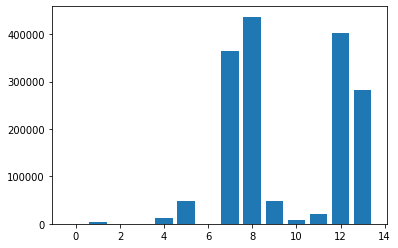

In [43]:
# Applying Pearson's correlation on X_num

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k=4)
fs.fit(X_num, y)
X_num_fs = fs.transform(X_num)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Feature 0: 250.036236
Feature 1: 419.137534


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


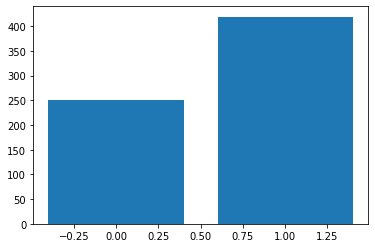

In [44]:
# Applying ANOVA F-Test on X_cat

from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

oe=OrdinalEncoder()
X_cat_oe=oe.fit_transform(X_cat).astype('int')

fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_cat_oe, y)
X_cat_fs = fs.transform(X_cat)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [45]:
X_new=pd.concat([pd.DataFrame(X_num_fs),pd.DataFrame(X_cat_fs)],axis=1)
print(X_new.shape)

(1826502, 6)


### ONE HOT ENCODING

In [46]:
X_final=pd.get_dummies(pd.DataFrame(X_new),drop_first=True)
print(X_final.shape)

(1826502, 1818)


### TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.2) 
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

### DATA SCALING

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0,1))
mms.fit(X_train)
X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)
print(X_train_scaled.shape,X_test_scaled.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(X_train)
X_train_std = ss.transform(X_train)
X_test_std = ss.transform(X_test)
print(X_train_std.shape,X_test_std.shape)

### PCA

In [ ]:
from sklearn.decomposition import PCA

pca= PCA(n_components = 0.95)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)
print(X_train_scaled_pca.shape,X_test_scaled_pca.shape)